In [1]:
import tensorflow as tf
import numpy as np

In [2]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.mlab as mlab

Simulate N by D data for logistic regression.

In [3]:
N = 100
D = 2
beta_true = np.asarray([1.0, -1.0]).reshape((2, 1))
dataX = np.random.normal(0, 1, N * D).reshape(N, D)
prob = 1.0 / (1.0 + np.exp(-np.dot(dataX, beta_true)))
dataY = np.random.binomial(1, prob) * 1.0
print(dataX.shape)
print(dataY.shape)

(100, 2)
(100, 1)


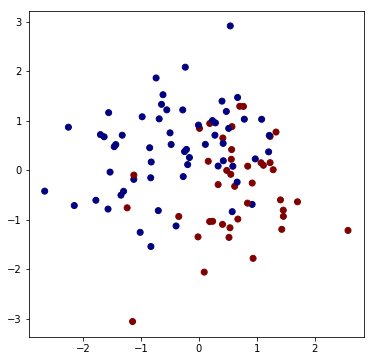

In [4]:
fig = plt.figure(figsize=(6, 6))
plt.scatter(dataX[:, 0], dataX[:, 1], c=dataY[:, 0], cmap='jet')
plt.show()

Placeholding tensors are for variables. Their dimensions must be declared.

In [5]:
X = tf.placeholder('float', [None, D]) 
Y = tf.placeholder('float', [None, 1])

Variable is for parameters. The initial values are randomly drawn from Normal distribution.

In [6]:
beta = tf.Variable(tf.random_normal([D, 1], stddev=1.0))

Perceptron output with sigmoid activation is also predicted probability.

In [7]:
pred = 1.0 / (1.0 + tf.exp(-tf.matmul(X, beta)))

Binary cross entropy loss or negative log likelihood.

In [8]:
loss = -1.0 * (tf.reduce_sum(Y * tf.log(pred) + (1.0 - Y) * tf.log(1 - pred)))

**Ingredients for gradient descent**

In [9]:
grad = tf.gradients(loss, beta)

In [10]:
print(grad)

[<tf.Tensor 'gradients/MatMul_grad/MatMul_1:0' shape=(2, 1) dtype=float32>]


In [11]:
delta = tf.placeholder('float', [D, 1])
step = beta.assign_add(delta)

**Exercise 3**

In [12]:
step_size = 0.01
n_step = 50
beta_path = np.zeros((n_step, 2))

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for i in range(n_step):
        # compute gradient
        g = sess.run(grad, feed_dict={X: dataX, Y: dataY})[0]
        sess.run(step, feed_dict={delta: -g * step_size}) # TODO!
        beta_path[i, :] = beta.eval().reshape(D)

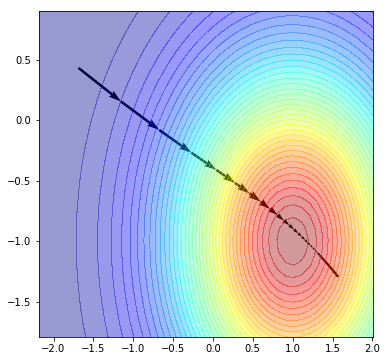

In [13]:
fig = plt.figure(figsize=(6, 6))
# gradient descent path
x = beta_path[:, 0]
y = beta_path[:, 1]
plt.quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1.0)
# Gaussian contour background
d = 0.1
xg = np.arange(np.min(x) - 0.5, np.max(x) + 0.5, d)
yg = np.arange(np.min(y) - 0.5, np.max(y) + 0.5, d)
Xg, Yg = np.meshgrid(xg, yg)
Z = mlab.bivariate_normal(Xg, Yg, 1.0, 1.0, 1.0, -1.0)
plt.contourf(Xg, Yg, Z, 50, cmap='jet', alpha=0.4)
plt.show()